# Data Processing in Python (WS 2021/2022)
#### Project - final code
#### Petr Dvořáček

***

##### Project outline:

1) Getting links for cars offers
2) Scraping cars attributees and data preparation
3) Data inspection
4) OLS model: data preparation and fitting
5) Creating subsets and getting results

***

### 1) Getting links for cars offers

Importing necessary packages:

In [322]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as plt
from time import sleep
from tqdm import tqdm
import re
import collections
import statsmodels.api as sm

Check whether the page is scrapable:

In [175]:
print('Page is scrapable.') if requests.get('https://carvago.com/robots.txt').status_code == 200 else print('Page is NOT scrapable.')

Page is scrapable.


In [4]:
print(requests.get('https://carvago.com/robots.txt').text)

User-agent: *
Disallow: 
Sitemap: https://carvago.com/sitemap.xml
Sitemap: https://carvago.com/sitemap-listed-cars.xml
Sitemap: https://carvago.com/sitemap-makes-models.xml


In [5]:
def getSoup(link):
    sleep(0.1) #to be kind to the website
    r = requests.get(link)
    r.encoding = 'UTF-8'
    return BeautifulSoup(r.text,'lxml')

In [6]:
soup = getSoup('https://carvago.com/cs/auta/skoda')

In [7]:
divs = soup.findAll('div', {'class':'css-1dapwlk e1oahio83'})

Code to get links for car offers:

In [10]:
def getAllLinks(link):
    soup = getSoup(link)
    divs = soup.findAll('div', {'class':'css-1dapwlk e1oahio83'})
    return ['https://carvago.com' + div.find('a')['href'] for div in divs]

Check if code scrape 'href' attributes (car links):

In [11]:

first_page = getAllLinks('https://carvago.com/cs/auta/skoda')
first_page

['https://carvago.com/cs/auto/43025505/skoda-fabia-1-2-tsi-66-kw',
 'https://carvago.com/cs/auto/48304837/skoda-rapid-70-kw',
 'https://carvago.com/cs/auto/47919164/skoda-rapid-1-2-tsi-green-tec-style-77-kw',
 'https://carvago.com/cs/auto/48441233/skoda-scala-1-6-tdi-dsg-ambition-85-kw',
 'https://carvago.com/cs/auto/48440366/skoda-superb-2-0-tdi-dsg-active-110-kw',
 'https://carvago.com/cs/auto/48149917/skoda-superb-110-kw',
 'https://carvago.com/cs/auto/48285494/skoda-scala-110-kw',
 'https://carvago.com/cs/auto/48432658/skoda-superb-2-0-tdi-active-110-kw',
 'https://carvago.com/cs/auto/47035228/skoda-superb-147-kw',
 'https://carvago.com/cs/auto/48318401/skoda-kodiaq-2-0-tsi-act-4x4-dsg-140-kw',
 'https://carvago.com/cs/auto/46729957/skoda-kodiaq-180-kw',
 'https://carvago.com/cs/auto/47934402/skoda-karoq-1-5-tsi-act-dsg-110-kw',
 'https://carvago.com/cs/auto/47949633/skoda-enyaq-iv-80-150-kw',
 'https://carvago.com/cs/auto/47801782/skoda-karoq-1-0-tsi-ambition-85-kw',
 'https://car

Check for duplicates:

In [12]:
print([item for item, count in collections.Counter(first_page).items() if count > 1]) #no duplicates

[]


Creating an empty list for car offers scraped from pages:

In [415]:
urls=[]
urls

[]

This code will scrape (n-1) pages:

In [416]:
for i in range (51):
    urls.append(getAllLinks('https://carvago.com/cs/auta/skoda?page='+str(i)))

Adding pages scraped right above to the empty list:

In [417]:
urls = sum(urls,[])
urls

['https://carvago.com/cs/auto/43025505/skoda-fabia-1-2-tsi-66-kw',
 'https://carvago.com/cs/auto/48452242/skoda-yeti-2-0-tdi-active-81-kw',
 'https://carvago.com/cs/auto/48304837/skoda-rapid-70-kw',
 'https://carvago.com/cs/auto/48439050/skoda-superb-2-0-tdi-dsg-active-110-kw',
 'https://carvago.com/cs/auto/47919164/skoda-rapid-1-2-tsi-green-tec-style-77-kw',
 'https://carvago.com/cs/auto/48441233/skoda-scala-1-6-tdi-dsg-ambition-85-kw',
 'https://carvago.com/cs/auto/48440366/skoda-superb-2-0-tdi-dsg-active-110-kw',
 'https://carvago.com/cs/auto/48285494/skoda-scala-110-kw',
 'https://carvago.com/cs/auto/48432658/skoda-superb-2-0-tdi-active-110-kw',
 'https://carvago.com/cs/auto/47035228/skoda-superb-147-kw',
 'https://carvago.com/cs/auto/48392384/skoda-citigo-1-0-mpi-44-kw',
 'https://carvago.com/cs/auto/48000196/skoda-citigo-1-0-mpi-tec-44-kw',
 'https://carvago.com/cs/auto/48318401/skoda-kodiaq-2-0-tsi-act-4x4-dsg-140-kw',
 'https://carvago.com/cs/auto/46729957/skoda-kodiaq-180-kw',

Check for duplicates:

In [418]:
print([item for item, count in collections.Counter(urls).items() if count > 1])

['https://carvago.com/cs/auto/43025505/skoda-fabia-1-2-tsi-66-kw', 'https://carvago.com/cs/auto/48452242/skoda-yeti-2-0-tdi-active-81-kw', 'https://carvago.com/cs/auto/48304837/skoda-rapid-70-kw', 'https://carvago.com/cs/auto/48439050/skoda-superb-2-0-tdi-dsg-active-110-kw', 'https://carvago.com/cs/auto/47919164/skoda-rapid-1-2-tsi-green-tec-style-77-kw', 'https://carvago.com/cs/auto/48441233/skoda-scala-1-6-tdi-dsg-ambition-85-kw', 'https://carvago.com/cs/auto/48440366/skoda-superb-2-0-tdi-dsg-active-110-kw', 'https://carvago.com/cs/auto/48285494/skoda-scala-110-kw', 'https://carvago.com/cs/auto/48432658/skoda-superb-2-0-tdi-active-110-kw', 'https://carvago.com/cs/auto/47035228/skoda-superb-147-kw', 'https://carvago.com/cs/auto/48392384/skoda-citigo-1-0-mpi-44-kw', 'https://carvago.com/cs/auto/48000196/skoda-citigo-1-0-mpi-tec-44-kw', 'https://carvago.com/cs/auto/48318401/skoda-kodiaq-2-0-tsi-act-4x4-dsg-140-kw', 'https://carvago.com/cs/auto/46729957/skoda-kodiaq-180-kw', 'https://car

Get rid of duplicite links and check again:

In [419]:
urls = set(urls)
print([item for item, count in collections.Counter(urls).items() if count > 1]) #no duplicates :)

[]


And we get only unique links:

In [420]:
urls

{'https://carvago.com/cs/auto/47498596/skoda-rapid-66-kw',
 'https://carvago.com/cs/auto/43121979/skoda-karoq-1-5-tsi-act-dsg-110-kw',
 'https://carvago.com/cs/auto/48156423/skoda-enyaq-iv-60-sportline-132-kw',
 'https://carvago.com/cs/auto/48324242/skoda-octavia-1-6-tdi-green-tec-85-kw',
 'https://carvago.com/cs/auto/48365998/skoda-scala-110-kw',
 'https://carvago.com/cs/auto/48305213/skoda-karoq-1-5-tsi-act-dsg-110-kw',
 'https://carvago.com/cs/auto/47938473/skoda-superb-147-kw',
 'https://carvago.com/cs/auto/47779717/skoda-scala-110-kw',
 'https://carvago.com/cs/auto/41527841/skoda-superb-2-0-tsi-4x4-dsg-l-k-200-kw',
 'https://carvago.com/cs/auto/42140149/skoda-kamiq-1-6-tdi-ambition-85-kw',
 'https://carvago.com/cs/auto/47035228/skoda-superb-147-kw',
 'https://carvago.com/cs/auto/46939256/skoda-octavia-2-0-tdi-dsg-style-110-kw',
 'https://carvago.com/cs/auto/46522633/skoda-rapid-1-4-tsi-dsg-ambition-90-kw',
 'https://carvago.com/cs/auto/48306228/skoda-superb-140-kw',
 'https://carv

Using code above we get 1000 unique car links:

In [421]:
len(urls) #1000 unique values

1000

### 2) Scraping cars attributes and data preparation

Creating object and scraping all essential information at once (class names should be correct, however, they has changed during the creation of the project):

In [411]:
#creating object
class Car:
    def __init__(self,link):
        self.soup = getSoup(link)
        self.name = self.getName()
        self.model = self.getModel()
        self.price = self.getPrice()
        self.country = self.getCountry()
        self.mileage = self.getMileage()
        self.registration = self.getRegistration()
        self.transmission = self.getTransmission()
        self.power = self.getPower()
        self.fueltype = self.getFueltype()

    def getName(self):
        try:
            return self.soup.find('h1',{'class':'ea6i44d0 css-13i2d41 e5xkr5t0'}).text.strip() if self.soup.find('h1',{'class':'ea6i44d0 css-13i2d41 e5xkr5t0'}) else 'unknown'
        except IndexError:
            float('NaN')  

    def getModel(self):
        try:
            return self.soup.find_all('div',{'class':'sc-dkPtRN kxDClK css-1b7garx ey3doxd4'})[1].text.strip() if self.soup.find_all('div',{'class':'sc-dkPtRN kxDClK css-1b7garx ey3doxd4'})[1] else float('NaN')
        except IndexError:
            float('NaN')  

    def getPrice(self):
        try:
            return self.soup.find('div',{'class':'css-1mbrvie e1hgzarh2'}).text.strip() if self.soup.find('div',{'class':'css-1mbrvie e1hgzarh2'}) else float('NaN')
        except IndexError:
            float('NaN')  

    def getCountry(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[4].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[4] else float('NaN')
        except IndexError:
            float('NaN')  

    def getMileage(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[5].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[5] else float('NaN')
        except IndexError:
            float('NaN')  

    def getRegistration(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[6].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[6] else float('NaN')
        except IndexError:
            float('NaN')  

    def getTransmission(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[7].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[7] else float('NaN')
        except IndexError:
            float('NaN')  

    def getPower(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[8].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[8] else float('NaN')
        except IndexError:
            float('NaN')  

    def getFueltype(self):
        try:
            return self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[9].text.strip() if self.soup.find_all('div',{'class':'css-o5n6vn e51cp1p1'})[9] else float('NaN')
        except IndexError:
            float('NaN')  
            
    def getmoreinfo(self):
        return pd.Series({
            'name':self.name,
            'model':self.model,
            'price':self.price,
            'country':self.country,
            'mileage':self.mileage,
            'registration':self.registration,
            'transmission':self.transmission,
            'power':self.power,
            'fueltype':self.fueltype
        })

Next step could take around 25 minutes for 1000 pages to be scraped. However, already scraped and prepared dataset is available further.

In [76]:
cars = [Car(link) for link in urls]

We take a look if our data were scraped corectly:

In [327]:
[c.name for c in cars]

['Skoda Rapid 66 kW',
 'Skoda Karoq 1.5 TSI ACT DSG 110 kW',
 'Skoda Enyaq iV 60 Sportline 132 kW',
 'Skoda Scala 110 kW',
 'Skoda Karoq 1.5 TSI ACT DSG 110 kW',
 'Skoda Superb 147 kW',
 'Skoda Scala 110 kW',
 'Skoda Superb 2.0 TSI 4x4 DSG L&K 200 kW',
 'Skoda Kamiq 1.6 TDI Ambition 85 kW',
 'Skoda Superb 147 kW',
 'Skoda Karoq 1.0 TSI Ambition 85 kW',
 'Skoda Kamiq 1.0 TSI Active 85 kW',
 'Skoda Octavia 2.0 TDI DSG Style 110 kW',
 'Skoda Rapid 1.4 TSI DSG Ambition 90 kW',
 'Skoda Superb 140 kW',
 'Skoda Kamiq 1.5 TSI DSG Style 110 kW',
 'Skoda Kodiaq 2.0 TSI ACT 4x4 DSG 140 kW',
 'Skoda Superb 2.0 TDI Tec Ambition 110 kW',
 'Skoda Superb 1.4 TSI Green Tec Active 92 kW',
 'Skoda Octavia 1.0 TSI DSG 85 kW',
 'Skoda Scala 1.5 TSI DSG Style 110 kW',
 'Skoda Scala 1.6 TDI DSG Style 85 kW',
 'Skoda Scala 1.0 TSI Ambition 81 kW',
 'Skoda Kodiaq 2.0 4x4 DSG RS 176 kW',
 'Skoda Octavia 2.0 TSI Green Tec RS 245 180 kW',
 'Skoda Karoq 1.0 TSI Ambition 85 kW',
 'Skoda Fabia 1.4 TDI Style 77 kW',


Creating data frame from scraped values:

In [328]:
dataframe = pd.DataFrame([c.getmoreinfo() for c in cars])
dataframe

,name,model,price,country,mileage,registration,transmission,power,fueltype
0,Skoda Rapid 66 kW,Rapid,207 990 Kč,Polsko,150 814 km,1/2017,Manuál,66 kW,Diesel
1,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,773 490 Kč,Německo,9 912 km,6/2021,Automat,110 kW,Benzín
2,Skoda Enyaq iV 60 Sportline 132 kW,Enyaq iV,1 132 490 Kč,Francie,1 000 km,12/2021,Automat,132 kW,Elektřina
3,Skoda Scala 110 kW,Scala,649 990 Kč,Německo,17 233 km,6/2020,Manuál,110 kW,Benzín
4,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,739 990 Kč,Německo,22 500 km,4/2021,Automat,110 kW,Benzín
...,...,...,...,...,...,...,...,...,...
995,Skoda Scala 1.0 TSI DSG 85 kW,Scala,460 990 Kč,Španělsko,17 466 km,2/2021,Automat,85 kW,Benzín
996,Skoda Superb Combi 2.0 TDI Green Tec Business ...,Superb,622 990 Kč,Německo,39 999 km,10/2019,Manuál,110 kW,Diesel
997,Skoda Kamiq 1.5 TSI DSG Ambition 110 kW,Kamiq,597 490 Kč,Německo,2 000 km,12/2021,Automat,110 kW,Benzín
998,Skoda Kodiaq 2.0 TSI ACT 4x4 DSG 140 kW,Kodiaq,1 005 490 Kč,Německo,8 307 km,6/2021,Automat,140 kW,Benzín


Searching for missing values:

In [329]:
dataframe.isna().sum()

name            0
model           2
price           2
country         2
mileage         2
registration    2
transmission    2
power           2
fueltype        2
dtype: int64

In [330]:
dataframe.loc[dataframe['name'] == 'unknown']

,name,model,price,country,mileage,registration,transmission,power,fueltype
337,unknown,None,NaN,None,None,None,None,None,None
897,unknown,None,NaN,None,None,None,None,None,None


Getting rid of missing values:

In [331]:
dataframe = dataframe.dropna()

In [332]:
dataframe.isna().sum()

name            0
model           0
price           0
country         0
mileage         0
registration    0
transmission    0
power           0
fueltype        0
dtype: int64

Modifying variables price, mileage, registration and power from strings to numbers:

In [333]:
dataframe['price'] = [sub.split('Kč')[0] for sub in dataframe['price']]
dataframe['price'] = [int(sub.replace('\xa0','')) for sub in dataframe['price']]
dataframe['price']

<ipython-input-333-24fd6888767a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price'] = [sub.split('Kč')[0] for sub in dataframe['price']]
<ipython-input-333-24fd6888767a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['price'] = [int(sub.replace('\xa0','')) for sub in dataframe['price']]


0       207990
1       773490
2      1132490
3       649990
4       739990
        ...   
995     460990
996     622990
997     597490
998    1005490
999     302490
Name: price, Length: 998, dtype: int64

In [334]:
dataframe['mileage'] = [sub.split('km')[0] for sub in dataframe['mileage']]
dataframe['mileage'] = [int(sub.replace('\xa0','')) for sub in dataframe['mileage']]
dataframe['mileage']

<ipython-input-334-b37d8f7ee260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['mileage'] = [sub.split('km')[0] for sub in dataframe['mileage']]
<ipython-input-334-b37d8f7ee260>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['mileage'] = [int(sub.replace('\xa0','')) for sub in dataframe['mileage']]


0      150814
1        9912
2        1000
3       17233
4       22500
        ...  
995     17466
996     39999
997      2000
998      8307
999     49117
Name: mileage, Length: 998, dtype: int64

In [335]:
dataframe['registration'] = [int(sub.split('/')[1]) for sub in dataframe['registration']]
dataframe['registration']

<ipython-input-335-b3b2976073c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['registration'] = [int(sub.split('/')[1]) for sub in dataframe['registration']]


0      2017
1      2021
2      2021
3      2020
4      2021
       ... 
995    2021
996    2019
997    2021
998    2021
999    2018
Name: registration, Length: 998, dtype: int64

In [336]:
dataframe['power'] = [int(sub.split(' ')[0]) for sub in dataframe['power']]
dataframe['power']

<ipython-input-336-90b26d60bcba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['power'] = [int(sub.split(' ')[0]) for sub in dataframe['power']]


0       66
1      110
2      132
3      110
4      110
      ... 
995     85
996    110
997    110
998    140
999     77
Name: power, Length: 998, dtype: int64

Getting dummy variables:

For model:

In [337]:
dataframe['model'].unique()

array(['Rapid', 'Karoq', 'Enyaq iV', 'Scala', 'Superb', 'Kamiq',
       'Octavia', 'Kodiaq', 'Fabia', 'Yeti', 'Citigo'], dtype=object)

In [338]:
dataframe['model'].value_counts()

Scala       184
Kodiaq      157
Superb      153
Octavia     126
Karoq       115
Rapid        62
Fabia        58
Citigo       39
Kamiq        36
Enyaq iV     35
Yeti         33
Name: model, dtype: int64

In [339]:
model_dummies = pd.get_dummies(dataframe['model'])
dataframe = pd.concat([dataframe,model_dummies], axis=1)

For transmission:

In [340]:
dataframe['transmission'].unique()

array(['Manuál', 'Automat'], dtype=object)

In [341]:
transmission_dummies = pd.get_dummies(dataframe['transmission'])
dataframe = pd.concat([dataframe,transmission_dummies], axis=1)

For fueltype:

In [342]:
dataframe['fueltype'].unique()

array(['Diesel', 'Benzín', 'Elektřina', 'Ostatní paliva', 'Hybrid', 'CNG',
       'LPG'], dtype=object)

In [343]:
dataframe['fueltype'].value_counts()

Benzín            580
Diesel            364
Elektřina          37
Hybrid             11
CNG                 3
LPG                 2
Ostatní paliva      1
Name: fueltype, dtype: int64

In [344]:
fueltype_dummies = pd.get_dummies(dataframe['fueltype'])
dataframe = pd.concat([dataframe,fueltype_dummies], axis=1)

We take a look if we have more electric car models.

In [345]:
dataframe['model'].loc[dataframe['fueltype'] == 'Elektřina'].unique()

array(['Enyaq iV', 'Citigo'], dtype=object)

We take a look at created dataframe:

In [346]:
dataframe

,name,model,price,country,mileage,registration,transmission,power,fueltype,Citigo,...,Yeti,Automat,Manuál,Benzín,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
0,Skoda Rapid 66 kW,Rapid,207990,Polsko,150814,2017,Manuál,66,Diesel,0,...,0,0,1,0,0,1,0,0,0,0
1,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,773490,Německo,9912,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
2,Skoda Enyaq iV 60 Sportline 132 kW,Enyaq iV,1132490,Francie,1000,2021,Automat,132,Elektřina,0,...,0,1,0,0,0,0,1,0,0,0
3,Skoda Scala 110 kW,Scala,649990,Německo,17233,2020,Manuál,110,Benzín,0,...,0,0,1,1,0,0,0,0,0,0
4,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,739990,Německo,22500,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Skoda Scala 1.0 TSI DSG 85 kW,Scala,460990,Španělsko,17466,2021,Automat,85,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
996,Skoda Superb Combi 2.0 TDI Green Tec Business ...,Superb,622990,Německo,39999,2019,Manuál,110,Diesel,0,...,0,0,1,0,0,1,0,0,0,0
997,Skoda Kamiq 1.5 TSI DSG Ambition 110 kW,Kamiq,597490,Německo,2000,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
998,Skoda Kodiaq 2.0 TSI ACT 4x4 DSG 140 kW,Kodiaq,1005490,Německo,8307,2021,Automat,140,Benzín,0,...,0,1,0,1,0,0,0,0,0,0


And save it as csv file:

In [347]:
dataframe.to_csv('cars1000almost.csv', index = False)

### 3) Data inspection

Or you can load already scraped and prepared dataframe:

In [401]:
#dataframe = pd.read_csv('cars1000almost.csv')
dataframe

,name,model,price,country,mileage,registration,transmission,power,fueltype,Citigo,...,Yeti,Automat,Manuál,Benzín,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
0,Skoda Rapid 66 kW,Rapid,207990,Polsko,150814,2017,Manuál,66,Diesel,0,...,0,0,1,0,0,1,0,0,0,0
1,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,773490,Německo,9912,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
2,Skoda Enyaq iV 60 Sportline 132 kW,Enyaq iV,1132490,Francie,1000,2021,Automat,132,Elektřina,0,...,0,1,0,0,0,0,1,0,0,0
3,Skoda Scala 110 kW,Scala,649990,Německo,17233,2020,Manuál,110,Benzín,0,...,0,0,1,1,0,0,0,0,0,0
4,Skoda Karoq 1.5 TSI ACT DSG 110 kW,Karoq,739990,Německo,22500,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Skoda Scala 1.0 TSI DSG 85 kW,Scala,460990,Španělsko,17466,2021,Automat,85,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
994,Skoda Superb Combi 2.0 TDI Green Tec Business ...,Superb,622990,Německo,39999,2019,Manuál,110,Diesel,0,...,0,0,1,0,0,1,0,0,0,0
995,Skoda Kamiq 1.5 TSI DSG Ambition 110 kW,Kamiq,597490,Německo,2000,2021,Automat,110,Benzín,0,...,0,1,0,1,0,0,0,0,0,0
996,Skoda Kodiaq 2.0 TSI ACT 4x4 DSG 140 kW,Kodiaq,1005490,Německo,8307,2021,Automat,140,Benzín,0,...,0,1,0,1,0,0,0,0,0,0


Moreover, we can look at the data graphically:

<AxesSubplot:>

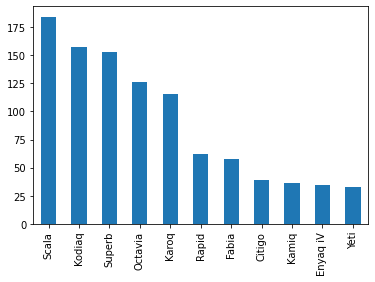

In [349]:
pd.value_counts(dataframe['model']).plot.bar()

<AxesSubplot:>

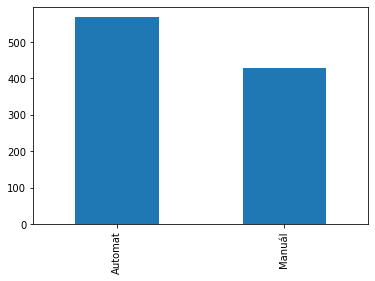

In [366]:
pd.value_counts(dataframe['transmission']).plot.bar()

<AxesSubplot:>

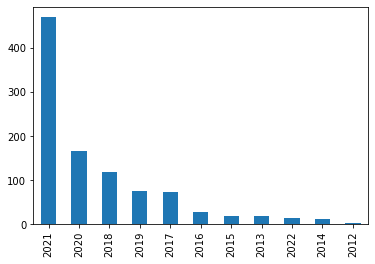

In [367]:
pd.value_counts(dataframe['registration']).plot.bar()

<AxesSubplot:>

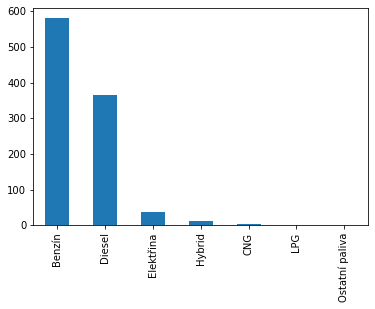

In [368]:
pd.value_counts(dataframe['fueltype']).plot.bar()

### 4) OLS model: data preparation and fitting

Then, we drop variables which were previsously modified to dummy variables:

In [249]:
dataframe.drop(['model','transmission','fueltype'], inplace=True, axis=1) #modified to dummy variables

Also, we drop 'name' column:

In [250]:
dataframe.drop(['name'], inplace=True, axis=1) #drop 'name' column

And we drop several more dummy variables in order to prevent multicollinearity (or dummy variable trap):

In [251]:
dataframe.drop(['Manuál','Benzín','Scala'], inplace=True, axis=1) #due to multicollinearity

Then, dataframe should contain 'country' variable and other variables should be in numerical format.

In [255]:
dataframe.head()

,price,country,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
0,207990,Polsko,150814,2017,66,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,773490,Německo,9912,2021,110,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1132490,Francie,1000,2021,132,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,649990,Německo,17233,2020,110,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,739990,Německo,22500,2021,110,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Furthermore, we sort 'country' variable by the number of occurences of each element:

In [256]:
dataframe['country'].value_counts() #germany, france, spain, poland, sweden

Německo        577
Francie        182
Španělsko       74
Polsko          47
Švédsko         46
Slovensko       21
Itálie          21
Belgie          12
Rakousko         8
Lucembursko      7
Nizozemsko       3
Name: country, dtype: int64

We can see that also graphically:

<AxesSubplot:ylabel='country'>

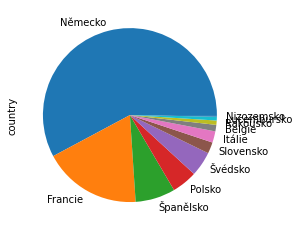

In [365]:
pd.value_counts(dataframe['country']).plot.pie()

We can take a look at summary statistics of the whole dataframe:

In [257]:
dataframe.describe()

,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,9.980000e+02,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,6.696523e+05,36845.112224,2019.540080,109.608216,0.039078,0.035070,0.058116,0.036072,0.11523,0.157315,...,0.062124,0.153307,0.033066,0.570140,0.003006,0.364729,0.037074,0.011022,0.002004,0.001002
std,3.021962e+05,36747.819281,1.983355,31.581450,0.193878,0.184049,0.234080,0.186563,0.31946,0.364280,...,0.241502,0.360463,0.178899,0.495304,0.054772,0.481596,0.189038,0.104458,0.044744,0.031654
min,1.159900e+05,200.000000,2012.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.569900e+05,12529.000000,2018.000000,85.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.207400e+05,23027.000000,2020.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.271150e+05,48705.000000,2021.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.447490e+06,160000.000000,2022.000000,206.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5) Creating subsets and getting results

Then, we make subsets of the dataframe for Germany, France, Spain, Poland and Sweden and we can take a look at summary statistics for each subset: 

In [258]:
cars_ger = dataframe.loc[dataframe['country'] == 'Německo']
cars_ger.drop(['country'], inplace=True, axis=1)
cars_ger.describe()

C:\Users\petrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,...,577.000000,577.000000,577.00000,577.000000,577.0,577.000000,577.000000,577.0,577.0,577.0
mean,7.465853e+05,35862.613518,2019.603120,118.090121,0.034662,0.008666,0.024263,0.013865,0.084922,0.223570,...,0.048527,0.204506,0.05026,0.613518,0.0,0.381282,0.012132,0.0,0.0,0.0
std,3.057105e+05,37133.196820,2.199319,30.898055,0.183081,0.092765,0.153999,0.117031,0.279007,0.416999,...,0.215063,0.403690,0.21867,0.487366,0.0,0.486123,0.109569,0.0,0.0,0.0
min,1.159900e+05,200.000000,2012.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,5.339900e+05,12700.000000,2019.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,7.269900e+05,22900.000000,2021.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.010490e+06,41600.000000,2021.000000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.0,1.000000,0.000000,0.0,0.0,0.0
max,1.447490e+06,160000.000000,2022.000000,206.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


In [259]:
cars_fr = dataframe.loc[dataframe['country'] == 'Francie']
cars_fr.drop(['country'], inplace=True, axis=1)
cars_fr.describe()

C:\Users\petrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,1.820000e+02,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,...,182.000000,182.000000,182.0,182.000000,182.0,182.000000,182.000000,182.000000,182.0,182.0
mean,6.382482e+05,26485.241758,2019.884615,100.291209,0.071429,0.153846,0.126374,0.109890,0.170330,0.065934,...,0.010989,0.087912,0.0,0.615385,0.0,0.346154,0.153846,0.027473,0.0,0.0
std,2.895390e+05,26016.207174,1.453852,29.523618,0.258250,0.361797,0.333187,0.313616,0.376959,0.248851,...,0.104539,0.283948,0.0,0.487846,0.0,0.477055,0.361797,0.163907,0.0,0.0
min,1.729900e+05,500.000000,2015.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,4.236150e+05,7801.750000,2019.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
50%,5.969900e+05,15572.000000,2021.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
75%,7.649900e+05,42026.000000,2021.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0
max,1.395990e+06,118500.000000,2021.000000,176.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0


In [260]:
cars_sp = dataframe.loc[dataframe['country'] == 'Španělsko']
cars_sp.drop(['country'], inplace=True, axis=1)
cars_sp.describe()

C:\Users\petrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,...,74.0,74.000000,74.0,74.000000,74.000000,74.000000,74.0,74.0,74.0,74.0
mean,488321.081081,28558.067568,2020.094595,87.621622,0.013514,0.0,0.094595,0.040541,0.081081,0.027027,...,0.0,0.067568,0.0,0.391892,0.027027,0.202703,0.0,0.0,0.0,0.0
std,87618.619285,25736.805558,1.049056,16.271416,0.116248,0.0,0.294652,0.198569,0.274823,0.163269,...,0.0,0.252716,0.0,0.491505,0.163269,0.404757,0.0,0.0,0.0,0.0
min,224490.000000,2392.000000,2018.000000,44.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,455990.000000,16384.000000,2020.000000,81.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,484990.000000,21668.000000,2020.000000,85.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,524490.000000,28051.000000,2021.000000,110.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,777490.000000,128600.000000,2021.000000,110.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [261]:
cars_pl = dataframe.loc[dataframe['country'] == 'Polsko']
cars_pl.drop(['country'], inplace=True, axis=1)
cars_pl.describe()

C:\Users\petrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000,47.000000,47.0
mean,3.475219e+05,82544.765957,2017.702128,86.276596,0.063830,0.0,0.106383,0.021277,0.042553,0.021277,...,0.510638,0.085106,0.0,0.170213,0.0,0.340426,0.0,0.021277,0.042553,0.0
std,1.832049e+05,44082.837205,1.640717,24.347754,0.247092,0.0,0.311661,0.145865,0.204030,0.145865,...,0.505291,0.282057,0.0,0.379883,0.0,0.478975,0.0,0.145865,0.204030,0.0
min,1.814900e+05,2953.000000,2014.000000,44.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,2.339900e+05,55792.500000,2017.000000,70.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
50%,2.744900e+05,81162.000000,2017.000000,81.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
75%,4.292400e+05,116165.500000,2018.000000,110.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0
max,1.074490e+06,151366.000000,2021.000000,162.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0


In [262]:
cars_swe = dataframe.loc[dataframe['country'] == 'Švédsko']
cars_swe.drop(['country'], inplace=True, axis=1)
cars_swe.describe()

C:\Users\petrd\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,mileage,registration,power,Citigo,Enyaq iV,Fabia,Kamiq,Karoq,Kodiaq,...,Rapid,Superb,Yeti,Automat,CNG,Diesel,Elektřina,Hybrid,LPG,Ostatní paliva
count,4.600000e+01,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.0,46.0,46.0
mean,5.573161e+05,44878.913043,2018.500000,103.608696,0.0,0.021739,0.043478,0.021739,0.478261,0.086957,...,0.086957,0.065217,0.021739,0.434783,0.0,0.282609,0.021739,0.0,0.0,0.0
std,2.173328e+05,24518.407437,1.345775,26.424297,0.0,0.147442,0.206185,0.147442,0.505047,0.284885,...,0.284885,0.249637,0.147442,0.501206,0.0,0.455243,0.147442,0.0,0.0,0.0
min,2.524900e+05,9270.000000,2014.000000,71.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,4.639900e+05,27637.500000,2018.000000,85.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,4.849900e+05,41970.000000,2018.000000,85.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,6.269900e+05,55040.000000,2019.000000,110.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0,0.0,0.0
max,1.338490e+06,140000.000000,2021.000000,180.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0


After that, we create simple OLS model with price of a car as explained variable and other variables as explanatory.

Moreover, we import two functions which was created before and are stored as .py-file 'ols_functions': 'simplemodel' returning summary statistics of the OLS model, and 'modelparameters' returning coefficients of variables.

In [372]:
import ols_functions as ols

And we can compare the effects of explanatory variables on dependent variable price separaterly for each of the chosen countries. 

In [412]:
coefficients = pd.DataFrame(zip(ols.modelparameters(cars_ger),ols.modelparameters(cars_fr),ols.modelparameters(cars_sp),ols.modelparameters(cars_pl),ols.modelparameters(cars_swe)))
coefficients.columns = ['Germany','France','Spain','Poland','Sweden']
coefficients.index = ols.modelparameters(cars_ger).index
coefficients.round(decimals=2)

,Germany,France,Spain,Poland,Sweden
const,-90167095.57,-68356654.12,-41591203.75,-34980872.12,-69793226.80
mileage,-1.77,-1.60,-1.08,-0.62,-0.87
registration,44724.87,33852.44,20754.04,17459.48,38786.77
power,4116.94,5519.90,1707.10,1930.26,2705.61
Citigo,121855.96,75168.77,-119801.98,-93303.47,0.00
Enyaq iV,590670.39,159106.51,-0.00,-0.00,-3846937.96
Fabia,45547.71,-22651.76,-83500.30,-85160.06,-8360583.75
Kamiq,-15518.30,18946.98,48130.66,2853.43,-8263699.56
Karoq,83740.54,89173.11,146718.48,219736.28,-8206571.65
Kodiaq,212278.35,168096.10,209719.99,472959.81,-8078949.74


From the table above we can see effects of independent variables on dependent variable price. Whats more, we observed these values for different countries. We can see that the effect of mileage on car price is negative and its effect is most noticeable for used cars in Germany where 1000 km driven decreases price of a car by approximatly 1770 CZK. The later a car was registered the more expensive a car is. We can also see that each kilowatt (kW) increases price of a car and the effect is biggest in France where each additional kW costs roughly 5520 CZK extra. Furthermore, we can conclude that automatic transmission increases price of a car. Unfortunatelly, most of the coefficients obtained from swedish dataset are very different compared to other subsets.

We can also take a look at summary statistics of models (e. g. for Germany):

In [422]:
ols.simplemodel(cars_ger)

C:\Users\petrd\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     581.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:47:28   Log-Likelihood:                -7278.5
No. Observations:                 577   AIC:                         1.459e+04
Df Residuals:                     560   BIC:                         1.467e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.017e+07    6.2e+06    -14.537      0.000   -1.02e+08    -7.8e+07
mileage           -1.7726      0.168    -10.556      0.000      -2.102      -1.443
registration    4.472e+04   3070.208     14.567      0.000    3.87e+04    5.08e+04
power           4116.9382    178.580     23.054      0.000    3766.170    4467.707
Citigo          1.219e+05   2.28e+04      5.345      0.000    7.71e+04    1.67e+05
Enyaq iV        5.907e+05   6.55e+04      9.021      0.000    4.62e+05    7.19e+05
Fabia           4.555e+04   2.25e+04      2.026      0.043    1380.941    8.97e+04
Kamiq          -1.552e+04   2.73e+04     -0.568      0.570   -6.91e+04    3.81e+04
Karoq           8.374e+04   1.45e+04      5.771      0.000    5.52e+04    1.12e+05
Kodiaq          2.123e+05    1.4e+04     15.211      0.000    1.85e+05     2.4e+05
Octavia         3.226e+04   1.48e+04      2.176      0.030    3133.971    6.14e+04
Rapid           1.058e+05   1.96e+04      5.387      0.000    6.72e+04    1.44e+05
Superb          9.514e+04   1.42e+04      6.697      0.000    6.72e+04    1.23e+05
Yeti            1.744e+05   2.12e+04      8.215      0.000    1.33e+05    2.16e+05
Automat         5.257e+04   9866.186      5.329      0.000    3.32e+04     7.2e+04
CNG             1.173e-09   1.13e-10     10.380      0.000    9.51e-10     1.4e-09
Diesel          8.453e+04   8032.028     10.524      0.000    6.88e+04       1e+05
Elektřina      -1.056e+05   5.64e+04     -1.872      0.062   -2.16e+05    5230.640
Hybrid                  0          0        nan        nan           0           0
LPG                     0          0        nan        nan           0           0
Ostatní paliva          0          0        nan        nan           0           0
==============================================================================
Omnibus:                       21.734   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.972
Skew:                           0.267   Prob(JB):                     9.37e-09
Kurtosis:                       4.119   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""